# K-nearest neighbors regression (KNN-Regression)

Supervised learning can be broadly classified into classification and **regression**. Regression involves predicting a value instead of classifying into specific classes. For example, predicting the economic growth rate next year or predicting the time of delivery are both regression problems.

KNN works by selecting the k nearest samples to the given sample and determining the class based on the most frequent one. KNN-Regression works in a similar way, but instead of classes, it predicts a certain value. To predict the value for a given sample, the nearest k samples are considered, and the simplest way to make a prediction is by calculating the mean value.

To use KNN or KNN-Regression in scikit-learn, we need to combine the data into a single dataset and create a **2D array-like** where row represents a ample and each column represents a feature. Hence, even if the data is one-dimensional with shape (length, ), we should convert it into (length, 1) by using the **reshape()** function. In NumPy, the -1 argument in the reshape function is used to automatically determine the size of one dimension while maintaining the other dimensions. Hence iff we want to reshape an array into (length, 1), we can reshape it using array.reshape(-1,1), where using -1 instead of len(array) automatically determines the appropriate size based on the length of the array.

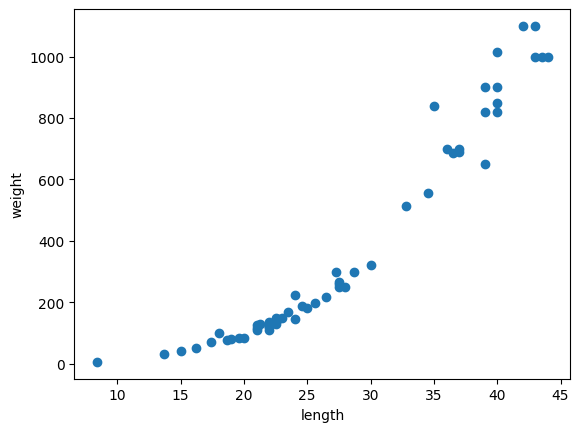

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#data : perch length and weight
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0])
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0])
perch_length = perch_length.reshape(-1,1)
perch_weight = perch_weight.reshape(-1,1)

plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In scikit-learn, KNN-Regression is implemented using the **KNeighborsRegressor** class. The fit() method is used to train the models, and the model's performance can be evaluated using the score() method.

Unlike classification problems, regression problems cannot estimate the exact value, because target values and prediction are arbitrary numerical values. Hence, the evaluation of the score is done by calculating the **coefficient of determination** or simply $R^2$. This value is calculated by 

$$
R^2 = 1 - \frac{\sum(target-prediction)^2}{\sum(target-mean)^2}\,.
$$

That is, if the prediction is closer to the target value, the coefficient of determination approaches 1.

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

#input: perch_length, target: perch_weight
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42)

knr = KNeighborsRegressor()
knr.fit(train_input, train_target) #training
score_by_training = knr.score(train_input, train_target)
score = knr.score(test_input, test_target)

print(f"score : {score_by_training} (training data)")
print(f"score : {score} (test data)")


score : 0.9698823289099254 (training data)
score : 0.992809406101064 (test data)


The score is high, but this value may not provide us with a complete measure of how good the prediction is. By calculating the difference between the target value and the predicted value, we can evaluate the extent of deviation in the prediction. scikit-learn provides various evaluation metrics in the sklearn.metrics package, including **mean_absolute_error** which calculates the mean absolute error between the target values and the predictions.

> **Mean Square Error (MSE)** is the average of the squared errors, calculated as:
> $$ MSE = \frac{1}{N}\sum_{i=1}^n ({\hat x}_i-x_i)^2 $$
> Here, ${\hat x}_i$ represents the predicted value and $x_i$ represents the actual value for the i-th data point. A smaller MSE value indicates better performance, and it is a commonly used loss function in regression tasks.
>
> **Mean Absolute Error (MAE)** is calculated as the average of the absolute differences between the predicted and actual values:
> $$ MAE = \frac{1}{N}\sum_{i=1}^n |{\hat x}_i-x_i| $$
> Again, ${\hat x}_i$ represents the predicted value and $x_i$ represents the actual value. A smaller MAE value indicates better performance. In regression tasks, MAE is commonly used as an evaluation metric.

In [32]:
from sklearn.metrics import mean_absolute_error

#making predictions based on test set (the result is an array)
test_prediction = knr.predict(test_input)

#calculating the mean absolute error about test set
mae = mean_absolute_error(test_target, test_prediction)
print(f"MAE is {mae} (gram).")

MAE is 19.157142857142862 (gram).


## Overfitting and Underfitting

Training the model on the training set often results in a good fit to the training data, leading to higher scores on the training set compared to the test set.

If the model scores well on the training set but performs poorly on the test set, it indicates overfitting to the training set. In other words, a model that only performs well on the training set is unlikely to generalize well to new data or real-world scenarios.

Conversely, underfitting occurs when the model is too simple to properly capture the underlying patterns in the training set. This can be observed when the test set scores higher than the training set or when both scores are lower. (In our case, the training set has a lower score than the test set, indicating that underfitting has occurred. This could be attributed to the small sizes of the training and test sets.)

To address underfitting, we can slightly increase the complexity of the model. For example, in the k-nearest neighbors, reducing the number of neighbors (k) can make the model more sensitive to local patterns in the training set. Conversely, increasing the number of neighbors allows the model to capture more general patterns across the data.

score : 0.9804899950518966 (training data)
score : 0.9746459963987609 (test data)


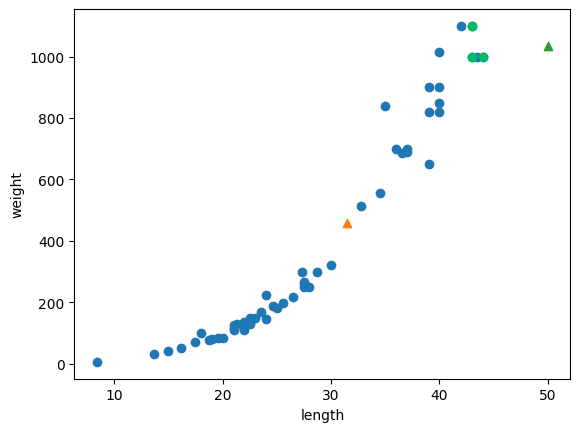

[[31.5]]cm perch will weigh [[456.66666667]]g.
[[50]]cm perch will weigh [[1033.33333333]]g.


In [30]:
knr = KNeighborsRegressor()
knr.n_neighbors = 3 #downsizing k size to address underfitting
knr.fit(train_input, train_target) #training
score_by_training = knr.score(train_input, train_target)
score = knr.score(test_input, test_target)

print(f"score : {score_by_training} (training data)")
print(f"score : {score} (test data)")

#new perch
perchA_length = np.array([31.5]).reshape(-1,1)
perchB_length = np.array([50]).reshape(-1,1)
perchA_weight = knr.predict(perchA_length)
perchB_weight = knr.predict(perchB_length)

#distances to neighbors of sample (after training)
distances, indexes = knr.kneighbors(perchB_length)

plt.scatter(perch_length, perch_weight)
plt.scatter(perchA_length, perchA_weight, marker='^')
plt.scatter(perchB_length, perchB_weight, marker='^')
plt.scatter(train_input[indexes], train_target[indexes], facecolor='#00bb66')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

print(f"{perchA_length}cm perch will weigh {perchA_weight}g.")
print(f"{perchB_length}cm perch will weigh {perchB_weight}g.")


Here we can observe the problem. From the scatter plot, it is evident that the longer the length, the greater the weight. By calculating the mean value of the weights of neighboring data points, we can determine that this value serves as the prediction. KNN regression can be sensitive to outliers and the distribution of the training data. If the new sample falls *outside the range or distribution* of the training set, it may lead to inaccurate or unexpected predictions.

In [31]:
import numpy as np

np.mean(train_target[indexes])

1033.3333333333333